In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# arterial=pd.read_csv('/Users/wenqi/Desktop/Vanderbilt/第三学期/case study/DS5360_case1_team3-main/subdata/arterial_subgroup.csv')
# bilirubin=pd.read_csv('/Users/wenqi/Desktop/Vanderbilt/第三学期/case study/DS5360_case1_team3-main/subdata/bilirubin_subgroup.csv')
# blood_property=pd.read_csv('/Users/wenqi/Desktop/Vanderbilt/第三学期/case study/DS5360_case1_team3-main/subdata/blood_property_subgroup.csv')

# blood_test=pd.read_csv('/Users/wenqi/Desktop/Vanderbilt/第三学期/case study/DS5360_case1_team3-main/subdata/blood_test_subgroup.csv')
# rapid_test=pd.read_csv('/Users/wenqi/Desktop/Vanderbilt/第三学期/case study/DS5360_case1_team3-main/subdata/rapid_test_subgroup.csv')
# transaminase=pd.read_csv('/Users/wenqi/Desktop/Vanderbilt/第三学期/case study/DS5360_case1_team3-main/subdata/transaminase_subgroup.csv')

# urine_subgroup=pd.read_csv('/Users/wenqi/Desktop/Vanderbilt/第三学期/case study/DS5360_case1_team3-main/subdata/urine_subgroup.csv')
# venous_subgroup=pd.read_csv('/Users/wenqi/Desktop/Vanderbilt/第三学期/case study/DS5360_case1_team3-main/subdata/venous_subgroup.csv')
# virus_subgroup=pd.read_csv('/Users/wenqi/Desktop/Vanderbilt/第三学期/case study/DS5360_case1_team3-main/subdata/virus_subgroup.csv')

In [19]:
data=pd.read_csv('/Users/wenqi/Desktop/Vanderbilt/第三学期/case study/DS5360_case1_team3-main/data/clean_dataset.csv')

In [20]:
#make some changes for subdata
data = data.drop(columns = ['Unnamed: 0'])
num = data.notnull().sum()
nulls = num.to_frame('count')
nulls =nulls.drop(nulls.loc[nulls['count']==0].index)
nulls =nulls.drop(nulls.loc[nulls['count']==5644].index)
nulls =nulls.sort_values(by=['count'], ascending=False)
mega = []
for index in range(len(nulls)-1):
    tmp = []
    tmp.append(nulls.iloc[index].name)
    for i in range(index+1,len(nulls)):
        tmp.append(nulls.iloc[i].name)
        tmp_data = data.dropna(subset=tmp,how = 'all')[tmp]
        if tmp_data.shape[0]> nulls.iloc[index].values :
            del tmp[-1]
    mega.append(tmp)

In [22]:
duplicate = []
for i in range(len(mega)-1):
    if (all(item in mega[i] for item in mega[i+1])==True):
        duplicate.append(i+1)
subsets = mega
iterate = 0
for item in set(duplicate):
    item = item - iterate
    subsets.pop(item)
    iterate += 1
single = []
for i in range(len(subsets)):
    if len(subsets[i])==1:
        single.append(i)

In [23]:
iterate = 0
for item in single:
    item = item - iterate
    subsets.pop(item)
    iterate += 1

In [32]:
virus_col = subsets[0][0:-1]
virus_col.insert(0,'patient_age_quantile')
virus_col.insert(0,'sars_cov_2_exam_result')
virus_col.insert(0,'patient_id')
virus_subgroup = data.dropna(subset=subsets[0][0:-1],how = 'all')[virus_col]

In [35]:
rapid_test_col = subsets[1][0:-1]
rapid_test_col.insert(0,'patient_age_quantile')
rapid_test_col.insert(0,'sars_cov_2_exam_result')
rapid_test_col.insert(0,'patient_id')
rapid_test_subgroup = data.dropna(subset=subsets[1][0:-1],how = 'all')[rapid_test_col]

In [36]:
transaminase_col =subsets[10][0:-2]
transaminase_col.insert(0,'patient_age_quantile')
transaminase_col.insert(0,'sars_cov_2_exam_result')
transaminase_col.insert(0,'patient_id')
transaminase_subgroup = data.dropna(subset=subsets[10][0:-2],how = 'all')[transaminase_col]

In [37]:
bilirubin_col =subsets[12][0:-1]
bilirubin_col.insert(0,'patient_age_quantile')
bilirubin_col.insert(0,'sars_cov_2_exam_result')
bilirubin_col.insert(0,'patient_id')
bilirubin_subgroup = data.dropna(subset=subsets[12][0:-1],how = 'all')[bilirubin_col]

In [38]:
venous_col =subsets[15]
venous_col.insert(0,'patient_age_quantile')
venous_col.insert(0,'sars_cov_2_exam_result')
venous_col.insert(0,'patient_id')
venous_subgroup = data.dropna(subset=subsets[15],how = 'all')[venous_col]

In [39]:
blood_property_col =subsets[17]
blood_property_col.insert(0,'patient_age_quantile')
blood_property_col.insert(0,'sars_cov_2_exam_result')
blood_property_col.insert(0,'patient_id')
blood_property_subgroup = data.dropna(subset=subsets[17],how = 'all')[blood_property_col]

In [40]:
urine_col =subsets[18]
urine_col.insert(0,'patient_age_quantile')
urine_col.insert(0,'sars_cov_2_exam_result')
urine_col.insert(0,'patient_id')
urine_col.append('urine_hemoglobin')
urine_subgroup = data.dropna(subset=subsets[18],how = 'all')[urine_col]

In [41]:
arterial_col =subsets[24]
arterial_col.insert(0,'patient_age_quantile')
arterial_col.insert(0,'sars_cov_2_exam_result')
arterial_col.insert(0,'patient_id')
arterial_subgroup = data.dropna(subset=subsets[24],how = 'all')[arterial_col]

In [42]:
blood_test_col =subsets[2][0:16]
blood_test_col.insert(0,'patient_age_quantile')
blood_test_col.insert(0,'sars_cov_2_exam_result')
blood_test_col.insert(0,'patient_id')
blood_test_subgroup = data.dropna(subset=subsets[2][0:16],how = 'all')[blood_test_col]

In [43]:
blood_test_subgroup

,patient_id,sars_cov_2_exam_result,patient_age_quantile,hematocrit,hemoglobin,lymphocytes,basophils,red_blood_cells,platelets,leukocytes,mean_corpuscular_hemoglobin_concentration_u_fffd_mchc,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,red_blood_cell_distribution_width_rdw,monocytes,mean_platelet_volume,neutrophils,serum_glucose
1,126e9dd13932f68,0,17,0.236515,-0.022340,0.318366,-0.223767,0.102004,-0.517413,-0.094610,-0.950790,-0.292269,1.482158,0.166192,-0.625073,0.357547,0.010677,-0.619086,-0.140648
8,8bb9d64f0215244,0,1,-1.571682,-0.774212,-0.005738,-0.223767,-0.850035,1.429667,0.364550,3.331071,0.178175,1.018625,-1.336024,-0.978899,0.068652,-1.672222,-0.127395,-0.413208
15,6c9d3323975b082,0,9,-0.747693,-0.586244,-1.114514,0.081693,-1.361315,-0.429480,-0.884923,0.542882,1.746323,-0.666950,1.668409,-1.067355,1.276759,-0.213711,0.880570,NaN
18,d3ea751f3db9de9,0,11,0.991838,0.792188,0.045436,-0.834685,0.542763,0.072992,-0.211488,-0.452899,0.334989,-0.709090,0.606842,0.171035,-0.220244,-0.550290,0.265957,NaN
22,2c2eae16c12a18a,0,9,0.190738,-0.147652,0.002791,0.387152,-0.127191,-0.668155,-1.132592,-1.249524,-0.083183,-0.709090,0.566783,0.613318,2.012129,1.020415,-0.422410,-0.837191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,c5b44ff9c7782fd,0,19,0.190738,0.165628,-1.583611,-0.834685,0.384090,-0.102873,-0.328365,-0.054585,-0.449085,0.892207,-0.474754,0.347948,1.066653,0.908222,1.118221,2.433532
5614,88cce1444e16f9c,0,19,-0.289922,-0.523588,-1.532437,0.081693,0.754327,0.663397,1.569499,-1.050367,-2.174047,-0.540532,-1.976971,0.967144,1.670707,-0.774677,1.134611,0.253050
5615,2733fac0d3f7138,0,15,0.717175,1.105468,0.002791,-0.223767,0.613285,-0.492289,-0.550988,1.538664,0.700891,-0.709090,0.005955,-1.155812,0.909074,-0.213711,-0.061837,NaN
5618,acd761fe16b5d0f,0,17,-3.242548,-2.779203,-1.830953,-1.140144,-3.318285,-1.773594,-1.733675,1.538664,2.059952,-0.582671,1.408024,-0.448160,1.381812,-0.550289,1.552548,0.041059


In [55]:
virus_subgroup_positive=virus_subgroup.loc[data['sars_cov_2_exam_result']==1]
virus_subgroup_negative=virus_subgroup.loc[data['sars_cov_2_exam_result']==0]
virus_subgroup_positive_mean=virus_subgroup_positive.mean().to_frame().T
virus_subgroup_positive_med=virus_subgroup_positive.median().to_frame().T
virus_subgroup_negative_mean=virus_subgroup_negative.mean().to_frame().T
virus_subgroup_negative_med=virus_subgroup_negative.median().to_frame().T
virus_subgroup_combine_mean=virus_subgroup_negative_mean.append(virus_subgroup_positive_mean,ignore_index=True)
virus_subgroup_combine_med=virus_subgroup_negative_med.append(virus_subgroup_positive_med,ignore_index=True)

In [56]:
virus_subgroup_combine_mean

,sars_cov_2_exam_result,patient_age_quantile,influenza_b,influenza_a,respiratory_syncytial_virus,rhinovirus_enterovirus,parainfluenza_4,coronavirus_hku1,parainfluenza_3,chlamydophila_pneumoniae,adenovirus,coronavirus229e,coronavirus_nl63,coronavirus_oc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2,parainfluenza_1
0,0.0,8.863124,0.059581,0.014493,0.041868,0.300806,0.015323,0.016129,0.008065,0.007258,0.010484,0.006452,0.033871,0.006452,0.079032,0.001613,0.01129,0.0,0.002419
1,1.0,12.098214,0.026786,0.000000,0.000000,0.053571,0.000000,0.000000,0.000000,0.000000,0.000000,0.008929,0.026786,0.000000,0.000000,0.000000,0.00000,0.0,0.000000


In [57]:
virus_subgroup_combine_med

,sars_cov_2_exam_result,patient_age_quantile,influenza_b,influenza_a,respiratory_syncytial_virus,rhinovirus_enterovirus,parainfluenza_4,coronavirus_hku1,parainfluenza_3,chlamydophila_pneumoniae,adenovirus,coronavirus229e,coronavirus_nl63,coronavirus_oc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2,parainfluenza_1
0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

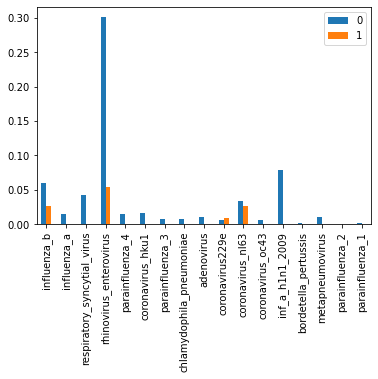

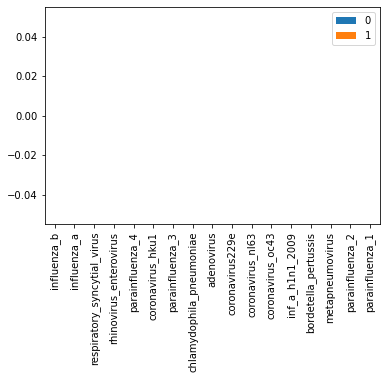

In [62]:
virus_subgroup_combine_mean.drop(labels=['sars_cov_2_exam_result',"patient_age_quantile"],axis=1) .T.plot(kind='bar')
virus_subgroup_combine_med.drop(labels=['sars_cov_2_exam_result',"patient_age_quantile"],axis=1) .T.plot(kind='bar')

In [63]:
rapid_test_subgroup_positive=rapid_test_subgroup.loc[data['sars_cov_2_exam_result']==1]
rapid_test_subgroup_negative=rapid_test_subgroup.loc[data['sars_cov_2_exam_result']==0]
rapid_test_subgroup_positive_mean=rapid_test_subgroup_positive.mean().to_frame().T
rapid_test_subgroup_positive_med=rapid_test_subgroup_positive.median().to_frame().T
rapid_test_subgroup_negative_mean=rapid_test_subgroup_negative.mean().to_frame().T
rapid_test_subgroup_negative_med=rapid_test_subgroup_negative.median().to_frame().T
rapid_test_subgroup_combine_mean=rapid_test_subgroup_negative_mean.append(rapid_test_subgroup_positive_mean,ignore_index=True)
rapid_test_subgroup_combine_med=rapid_test_subgroup_negative_med.append(rapid_test_subgroup_positive_med,ignore_index=True)

In [64]:
rapid_test_subgroup_combine_mean

,sars_cov_2_exam_result,patient_age_quantile,influenza_b_rapid_test,influenza_a_rapid_test
0,0.0,7.270449,0.062005,0.068602
1,1.0,11.016129,0.032258,0.000000


In [65]:
rapid_test_subgroup_combine_med

,sars_cov_2_exam_result,patient_age_quantile,influenza_b_rapid_test,influenza_a_rapid_test
0,0.0,6.0,0.0,0.0
1,1.0,11.0,0.0,0.0


<AxesSubplot:>

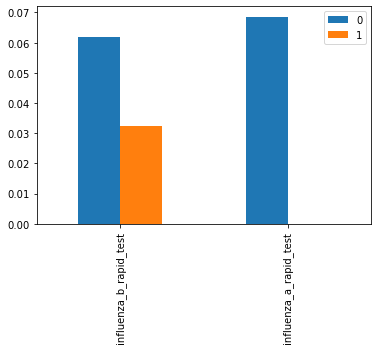

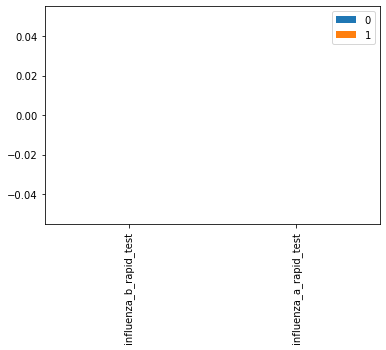

In [66]:
rapid_test_subgroup_combine_mean.drop(labels=['sars_cov_2_exam_result',"patient_age_quantile"],axis=1) .T.plot(kind='bar')
rapid_test_subgroup_combine_med.drop(labels=['sars_cov_2_exam_result',"patient_age_quantile"],axis=1) .T.plot(kind='bar')

<AxesSubplot:>

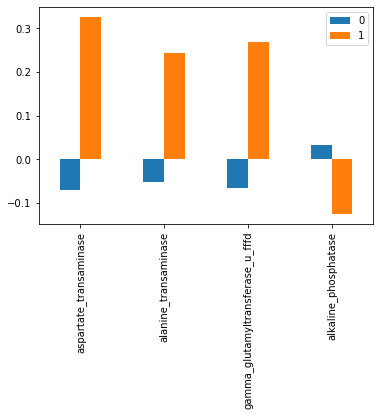

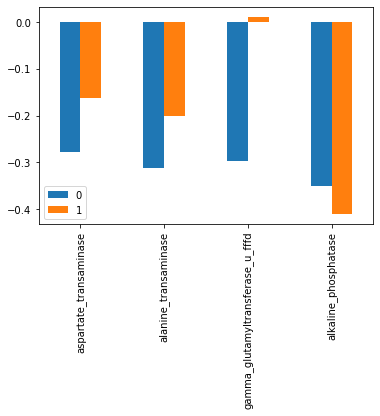

In [67]:
transaminase_subgroup_positive=transaminase_subgroup.loc[data['sars_cov_2_exam_result']==1]
transaminase_subgroup_negative=transaminase_subgroup.loc[data['sars_cov_2_exam_result']==0]
transaminase_subgroup_positive_mean=transaminase_subgroup_positive.mean().to_frame().T
transaminase_subgroup_positive_med=transaminase_subgroup_positive.median().to_frame().T
transaminase_subgroup_negative_mean=transaminase_subgroup_negative.mean().to_frame().T
transaminase_subgroup_negative_med=transaminase_subgroup_negative.median().to_frame().T
transaminase_subgroup_combine_mean=transaminase_subgroup_negative_mean.append(transaminase_subgroup_positive_mean,ignore_index=True)
transaminase_subgroup_combine_med=transaminase_subgroup_negative_med.append(transaminase_subgroup_positive_med,ignore_index=True)

transaminase_subgroup_combine_mean.drop(labels=['sars_cov_2_exam_result',"patient_age_quantile"],axis=1) .T.plot(kind='bar')
transaminase_subgroup_combine_med.drop(labels=['sars_cov_2_exam_result',"patient_age_quantile"],axis=1) .T.plot(kind='bar')


<AxesSubplot:>

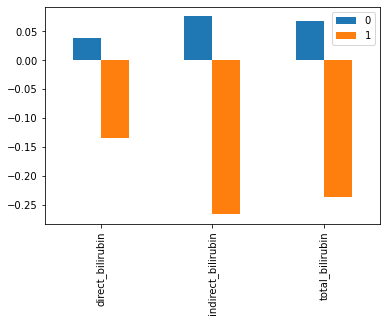

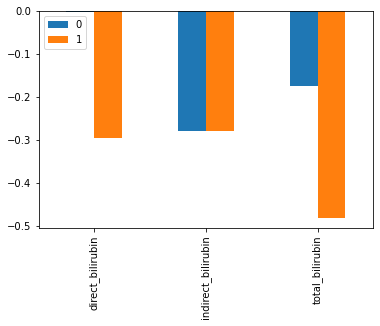

In [68]:
bilirubin_subgroup_positive=bilirubin_subgroup.loc[data['sars_cov_2_exam_result']==1]
bilirubin_subgroup_negative=bilirubin_subgroup.loc[data['sars_cov_2_exam_result']==0]
bilirubin_subgroup_positive_mean=bilirubin_subgroup_positive.mean().to_frame().T
bilirubin_subgroup_positive_med=bilirubin_subgroup_positive.median().to_frame().T
bilirubin_subgroup_negative_mean=bilirubin_subgroup_negative.mean().to_frame().T
bilirubin_subgroup_negative_med=bilirubin_subgroup_negative.median().to_frame().T
bilirubin_subgroup_combine_mean=bilirubin_subgroup_negative_mean.append(bilirubin_subgroup_positive_mean,ignore_index=True)
bilirubin_subgroup_combine_med=bilirubin_subgroup_negative_med.append(bilirubin_subgroup_positive_med,ignore_index=True)

bilirubin_subgroup_combine_mean.drop(labels=['sars_cov_2_exam_result',"patient_age_quantile"],axis=1) .T.plot(kind='bar')
bilirubin_subgroup_combine_med.drop(labels=['sars_cov_2_exam_result',"patient_age_quantile"],axis=1) .T.plot(kind='bar')


<AxesSubplot:>

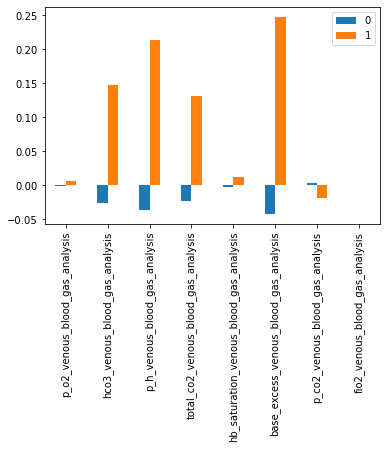

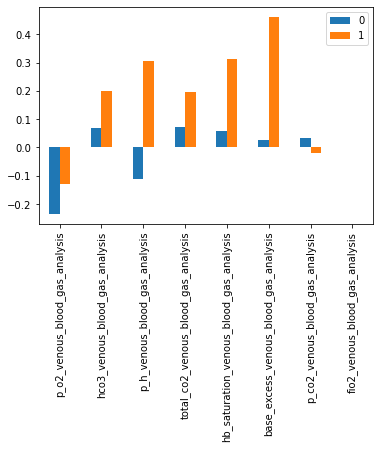

In [69]:
venous_subgroup_positive=venous_subgroup.loc[data['sars_cov_2_exam_result']==1]
venous_subgroup_negative=venous_subgroup.loc[data['sars_cov_2_exam_result']==0]
venous_subgroup_positive_mean=venous_subgroup_positive.mean().to_frame().T
venous_subgroup_positive_med=venous_subgroup_positive.median().to_frame().T
venous_subgroup_negative_mean=venous_subgroup_negative.mean().to_frame().T
venous_subgroup_negative_med=venous_subgroup_negative.median().to_frame().T
venous_subgroup_combine_mean=venous_subgroup_negative_mean.append(venous_subgroup_positive_mean,ignore_index=True)
venous_subgroup_combine_med=venous_subgroup_negative_med.append(venous_subgroup_positive_med,ignore_index=True)

venous_subgroup_combine_mean.drop(labels=['sars_cov_2_exam_result',"patient_age_quantile"],axis=1) .T.plot(kind='bar')
venous_subgroup_combine_med.drop(labels=['sars_cov_2_exam_result',"patient_age_quantile"],axis=1) .T.plot(kind='bar')


<AxesSubplot:>

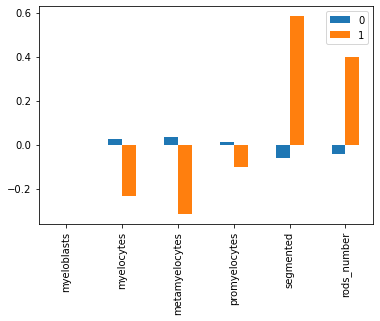

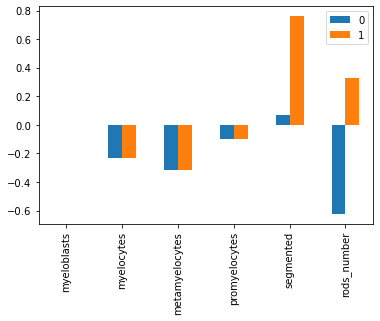

In [70]:
blood_property_subgroup_positive=blood_property_subgroup.loc[data['sars_cov_2_exam_result']==1]
blood_property_subgroup_negative=blood_property_subgroup.loc[data['sars_cov_2_exam_result']==0]
blood_property_subgroup_positive_mean=blood_property_subgroup_positive.mean().to_frame().T
blood_property_subgroup_positive_med=blood_property_subgroup_positive.median().to_frame().T
blood_property_subgroup_negative_mean=blood_property_subgroup_negative.mean().to_frame().T
blood_property_subgroup_negative_med=blood_property_subgroup_negative.median().to_frame().T
blood_property_subgroup_combine_mean=blood_property_subgroup_negative_mean.append(blood_property_subgroup_positive_mean,ignore_index=True)
blood_property_subgroup_combine_med=blood_property_subgroup_negative_med.append(blood_property_subgroup_positive_med,ignore_index=True)

blood_property_subgroup_combine_mean.drop(labels=['sars_cov_2_exam_result',"patient_age_quantile"],axis=1) .T.plot(kind='bar')
blood_property_subgroup_combine_med.drop(labels=['sars_cov_2_exam_result',"patient_age_quantile"],axis=1) .T.plot(kind='bar')


<AxesSubplot:>

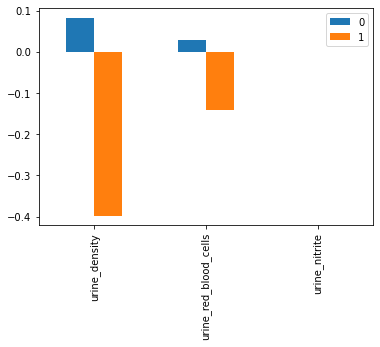

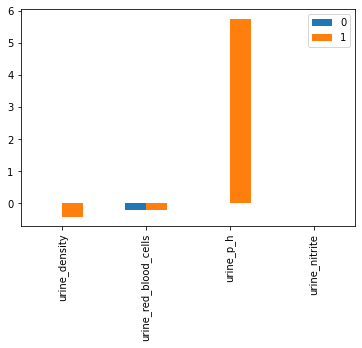

In [71]:
urine_subgroup_positive=urine_subgroup.loc[data['sars_cov_2_exam_result']==1]
urine_subgroup_negative=urine_subgroup.loc[data['sars_cov_2_exam_result']==0]
urine_subgroup_positive_mean=urine_subgroup_positive.mean().to_frame().T
urine_subgroup_positive_med=urine_subgroup_positive.median().to_frame().T
urine_subgroup_negative_mean=urine_subgroup_negative.mean().to_frame().T
urine_subgroup_negative_med=urine_subgroup_negative.median().to_frame().T
urine_subgroup_combine_mean=urine_subgroup_negative_mean.append(urine_subgroup_positive_mean,ignore_index=True)
urine_subgroup_combine_med=urine_subgroup_negative_med.append(urine_subgroup_positive_med,ignore_index=True)

urine_subgroup_combine_mean.drop(labels=['sars_cov_2_exam_result',"patient_age_quantile"],axis=1) .T.plot(kind='bar')
urine_subgroup_combine_med.drop(labels=['sars_cov_2_exam_result',"patient_age_quantile"],axis=1) .T.plot(kind='bar')


<AxesSubplot:>

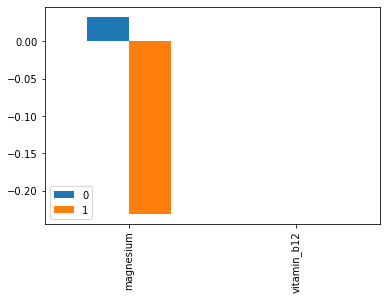

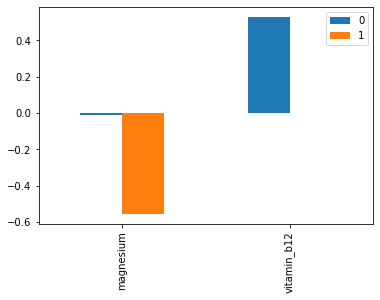

In [72]:
arterial_subgroup_positive=arterial_subgroup.loc[data['sars_cov_2_exam_result']==1]
arterial_subgroup_negative=arterial_subgroup.loc[data['sars_cov_2_exam_result']==0]
arterial_subgroup_positive_mean=arterial_subgroup_positive.mean().to_frame().T
arterial_subgroup_positive_med=arterial_subgroup_positive.median().to_frame().T
arterial_subgroup_negative_mean=arterial_subgroup_negative.mean().to_frame().T
arterial_subgroup_negative_med=arterial_subgroup_negative.median().to_frame().T
arterial_subgroup_combine_mean=arterial_subgroup_negative_mean.append(arterial_subgroup_positive_mean,ignore_index=True)
arterial_subgroup_combine_med=arterial_subgroup_negative_med.append(arterial_subgroup_positive_med,ignore_index=True)

arterial_subgroup_combine_mean.drop(labels=['sars_cov_2_exam_result',"patient_age_quantile"],axis=1) .T.plot(kind='bar')
arterial_subgroup_combine_med.drop(labels=['sars_cov_2_exam_result',"patient_age_quantile"],axis=1) .T.plot(kind='bar')




<AxesSubplot:>

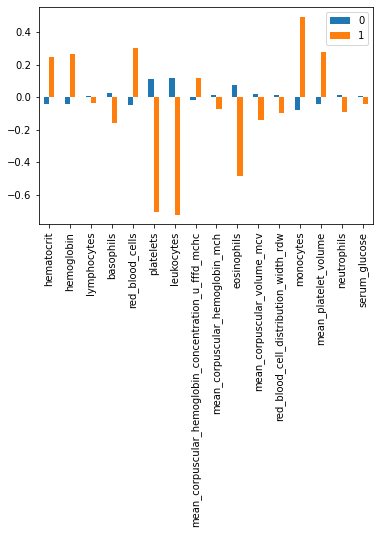

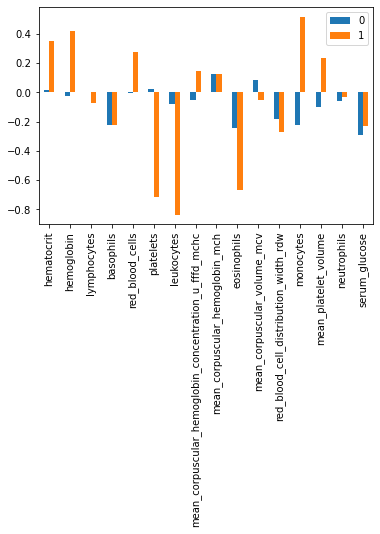

In [73]:
blood_test_subgroup_positive=blood_test_subgroup.loc[data['sars_cov_2_exam_result']==1]
blood_test_subgroup_negative=blood_test_subgroup.loc[data['sars_cov_2_exam_result']==0]
blood_test_subgroup_positive_mean=blood_test_subgroup_positive.mean().to_frame().T
blood_test_subgroup_positive_med=blood_test_subgroup_positive.median().to_frame().T
blood_test_subgroup_negative_mean=blood_test_subgroup_negative.mean().to_frame().T
blood_test_subgroup_negative_med=blood_test_subgroup_negative.median().to_frame().T
blood_test_subgroup_combine_mean=blood_test_subgroup_negative_mean.append(blood_test_subgroup_positive_mean,ignore_index=True)
blood_test_subgroup_combine_med=blood_test_subgroup_negative_med.append(blood_test_subgroup_positive_med,ignore_index=True)

blood_test_subgroup_combine_mean.drop(labels=['sars_cov_2_exam_result',"patient_age_quantile"],axis=1) .T.plot(kind='bar')
blood_test_subgroup_combine_med.drop(labels=['sars_cov_2_exam_result',"patient_age_quantile"],axis=1) .T.plot(kind='bar')

